In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual mais agradável
sns.set_theme(style="whitegrid")

df = pd.read_csv('../arquivos/WA_Fn-UseC_-HR-Employee-Attrition.csv')



In [11]:
# Verificando as dimensões do dataset (linhas, colunas)
print(f"O dataset possui {df.shape[0]} linhas (funcionários) e {df.shape[1]} colunas (características).\n")

# Obtendo um resumo conciso do DataFrame, incluindo tipos de dados e valores não nulos
print("Informações sobre os tipos de dados e valores nulos:")
df.info()

# Apresentando um resumo estatístico das colunas numéricas
print("\nResumo estatístico das variáveis numéricas:")
display(df.describe())

# Removendo colunas que não agregam valor ao modelo preditivo ; EmployeeCount, EmployeeNumber, Over18(todos são maiores de 18), StandardHours
colunas_para_remover = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_limpo = df.drop(columns=colunas_para_remover)

print(f"\nDataset após remover colunas irrelevantes. Nova dimensão: {df_limpo.shape}")

O dataset possui 1470 linhas (funcionários) e 35 colunas (características).

Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  Ho

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Dataset após remover colunas irrelevantes. Nova dimensão: (1470, 31)


In [12]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
features_categoricas = df.select_dtypes(include=['object']).columns
print(f"Features categóricas a serem transformadas: {list(features_categoricas)}\n")

# Aplicando a dummificação com pandas
df_final = pd.get_dummies(df, columns=features_categoricas, drop_first=True)

print("Dimensões do dataset após a dummificação:", df_final.shape)
print("\nVisualização das primeiras linhas do dataset final processado:")
display(df_final.head())

y = df_final['Attrition']
colunas_para_remover = ['Attrition']
if 'Attrition_numeric' in df_final.columns:
    colunas_para_remover.append('Attrition_numeric')
    
X = df_final.drop(columns=colunas_para_remover)


print("--- Variáveis X e y definidas com sucesso ---")
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)
print("-" * 40)

Features categóricas a serem transformadas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Dimensões do dataset após a dummificação: (1470, 48)

Visualização das primeiras linhas do dataset final processado:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,1,2,3,61,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,1,4,4,92,2,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,1,5,4,56,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,7,1,40,3,...,True,False,False,False,False,False,False,True,False,False


--- Variáveis X e y definidas com sucesso ---
Formato de X: (1470, 47)
Formato de y: (1470,)
----------------------------------------


In [13]:
# Divisão entre treino (70%) e teste (30%)
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # separa os dados de forma aleatória
)

# Treinamento do modelo
from sklearn.naive_bayes import GaussianNB  # importa o modelo de classificação Naive Bayes Gaussiano

modelo = GaussianNB()  # cria o modelo Naive Bayes
modelo.fit(X_train, y_train)  # treina o modelo usando os dados de treino

# Avaliação do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # importa métricas de avaliação

# Previsões
y_pred = modelo.predict(X_test)  # usa o modelo treinado para prever com base nos dados de teste

# Métricas
print("Acurácia:", accuracy_score(y_test, y_pred))  # mostra a taxa de acerto geral
print("Precisão:", precision_score(y_test, y_pred))  # mostra a proporção de previsões corretas de sobreviventes
print("Recall:", recall_score(y_test, y_pred))  # mostra quantos sobreviventes reais foram corretamente identificados
print("F1-score:", f1_score(y_test, y_pred))  # combina precisão e recall em uma única métrica


Acurácia: 0.7233560090702947
Precisão: 0.31386861313868614
Recall: 0.6056338028169014
F1-score: 0.41346153846153844


--- Métricas de Avaliação do Modelo Naive Bayes ---
Acurácia (Accuracy):   72.34%
Precisão (Precision): 31.39%
Recall (Revocação): 60.56%
F1-Score:             41.35%

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

   Ficou (0)       0.91      0.75      0.82       370
    Saiu (1)       0.31      0.61      0.41        71

    accuracy                           0.72       441
   macro avg       0.61      0.68      0.62       441
weighted avg       0.81      0.72      0.75       441


--- Matriz de Confusão ---


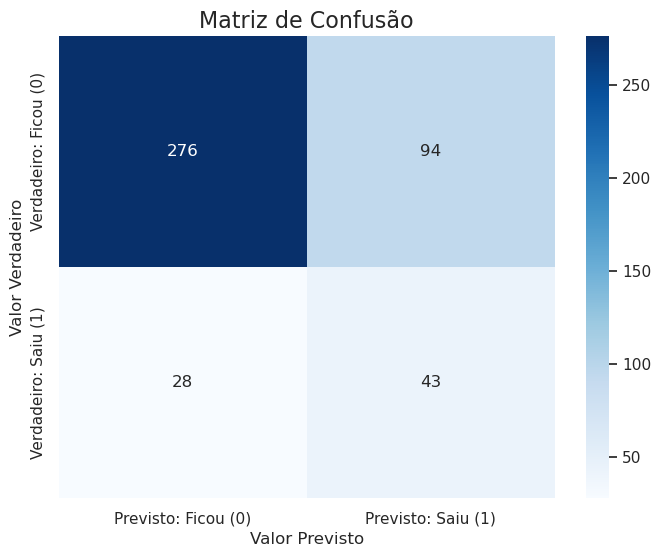

In [16]:
# Matriz de confusão
import matplotlib.pyplot as plt  # importa biblioteca para gráficos
import seaborn as sns  # importa biblioteca para gráficos estatísticos

cm = confusion_matrix(y_test, y_pred)  # cria a matriz de confusão (comparação entre o real e o previsto)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("--- Métricas de Avaliação do Modelo Naive Bayes ---")
print(f"Acurácia (Accuracy):   {acc * 100:.2f}%")
print(f"Precisão (Precision): {prec * 100:.2f}%")
print(f"Recall (Revocação): {rec * 100:.2f}%")
print(f"F1-Score:             {f1 * 100:.2f}%")

# Gerar o Relatório de Classificação

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test, y_pred, target_names=['Ficou (0)', 'Saiu (1)']))

# Gerar e plotar a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Previsto: Ficou (0)', 'Previsto: Saiu (1)'],
            yticklabels=['Verdadeiro: Ficou (0)', 'Verdadeiro: Saiu (1)'])
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Valor Verdadeiro')
plt.xlabel('Valor Previsto')
plt.show()